# Exercise 06 : Scatter Matrix

- create a dataframe where each user of the test group has the average difference, number of pageviews and number of commits
- do not take project1 into account for calculations of the average difference and the number of commits
- take the number of commits from the checker table
- the figsize is still the same, you can choose whatever fontsize you like as well as the color palette
- the size of the dots should be 200
- the width of the lines of the diagonal graphs (kde) should be 3

In [1]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('../data/logs.db')
cursor = connection.cursor()
cursor.execute("ATTACH DATABASE '../data/checking-logs.sqlite' AS logs")
connection.commit()

test = pd.read_csv('../data/ab-test.csv')
test = test[test['group'] == 'test']
test = test.groupby('uid')['diff'].mean().reset_index(name='avg_diff')
test_uid = test['uid'].to_list()
formatted_uids = ','.join(f"'{uid}'" for uid in test_uid)
test
commit_query = f"""
SELECT uid, timestamp AS 'commit'
FROM checker
WHERE uid IN ({formatted_uids})
AND labname != 'project1'
;"""

view_query = f"""
SELECT uid, datetime AS 'views'
FROM pageviews
WHERE uid IN ({formatted_uids})
;"""

commit = pd.io.sql.read_sql(commit_query, connection)
view = pd.io.sql.read_sql(view_query, connection)
commit_count = commit.groupby('uid').size().reset_index(name='num_commit')
view_count = view.groupby('uid').size().reset_index(name='pageviews')

result = pd.merge(test, view_count, how='outer', on='uid')
result = pd.merge(result, commit_count, how='outer', on='uid')

In [2]:
test

,uid,avg_diff
0,user_1,-54.666667
1,user_18,-6.750000
2,user_19,-115.166667
3,user_21,-95.500000
4,user_25,-98.416667
5,user_28,-94.750000
6,user_3,-114.250000


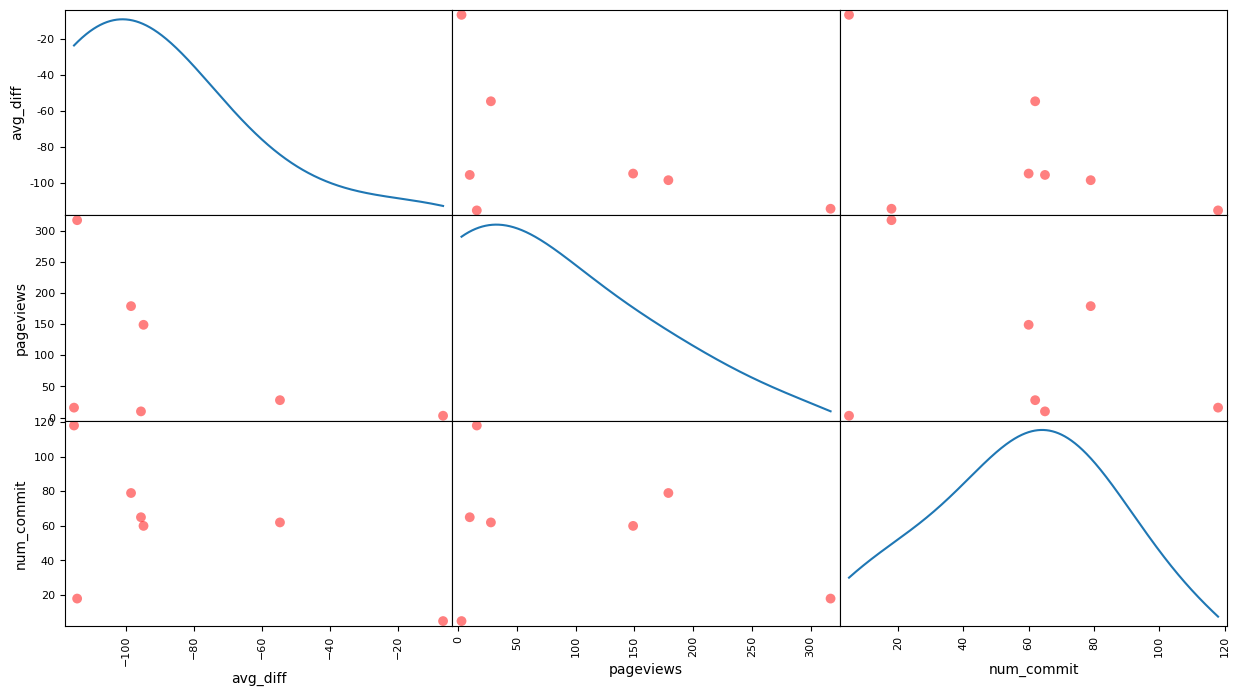

In [3]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(result, figsize=(15, 8), diagonal='kde', color='red', s=200)


## Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

no

## Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?

no

##  Can we say that there are many users with a small average difference and a few with a large average difference

no